In [2]:
import os

print(os.listdir('dfs'))

['exp1_preprocessed_20-df.csv', 'exp1_preprocessed_20-mean-salience.csv', 'exp1_unprocessed_20-df.csv', 'exp1_unprocessed_20-mean-salience.csv', 'exp2_preprocessed_70-df.csv', 'exp2_preprocessed_70-mean-salience.csv', 'exp2_unprocessed_70-df.csv', 'exp2_unprocessed_70-mean-salience.csv', 'exp3_preprocessed_150-df.csv', 'exp3_preprocessed_150-mean-salience.csv', 'exp3_unprocessed_150-df.csv', 'exp3_unprocessed_150-mean-salience.csv']


In [3]:
print(len('-mean-salience.csv'))
print(os.listdir('dfs')[1][-18:])
print(os.listdir('dfs')[1][-18:] == '-mean-salience.csv')

18
-mean-salience.csv
True


### Plot mean salience

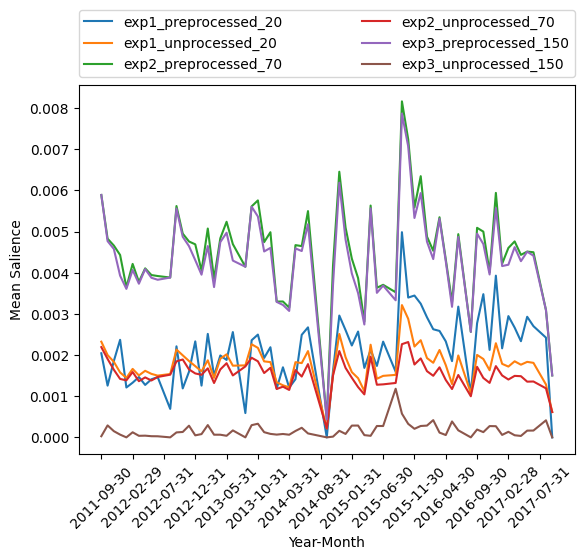

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

dfs = []
for csv_file in os.listdir('dfs'):
    if not csv_file.endswith('-mean-salience.csv'):
        continue
    df = pd.read_csv(os.path.join('dfs',csv_file))
    dfs.append((df, csv_file))

for df, name in dfs:
    x = df['year_month']
    y = df['salience']
    plt.plot(x, y, label=name[:-18])



plt.xlabel('Year-Month')
plt.ylabel('Mean Salience')
#plt.ylim([0,0.06])
plt.xticks(x[::5], rotation=45)

plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
        
    

### Plot df

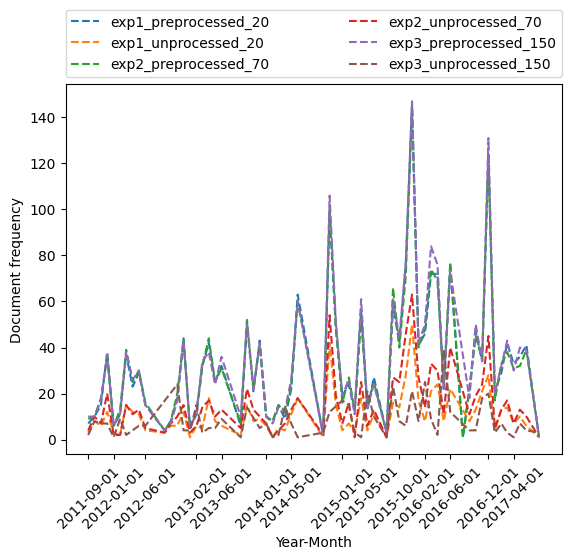

In [20]:
dfs = []
for csv_file in os.listdir('dfs'):
    if not csv_file.endswith('-df.csv'):
        continue
    df = pd.read_csv(os.path.join('dfs',csv_file))
    dfs.append((df, csv_file))
   
for df, _ in dfs:
    df['year_month'] = pd.to_datetime(df['year_month'])

start_date = dfs[0][0]['year_month'].min()
end_date = dfs[0][0]['year_month'].max()
    
# find start and end date
for df, _ in dfs:
    start_date = min(df['year_month'].min(), start_date)
    end_date = max(df['year_month'].max(), end_date)

for df, _ in dfs:
    df = df[df['year_month'] <= end_date]
    df = df[df['year_month'] >= start_date]


for df, name in dfs:
    x = df['year_month']
    y = df['topic']
    plt.plot(x, y, label=name[:-7], linestyle='--')
    
plt.xlabel('Year-Month')
plt.ylabel('Document frequency')
plt.xticks(x[::4], rotation=45)
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
